# ZADANIE
Za pomocą języka R przeanalizować dowolne dane z poprzednich laboratoriów. Elementy obowiązkowe:

1. W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy)). Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych parametrów (dla każdego takiego zestawu)  **(1p.)**
2. Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy) **(1p.)**
3. Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników (słupki błędów)  **(1p.)**

In [35]:
library(microbenchmark)

df <- data.frame(size = integer(),
                 vector = double(),
                 matrix = double())

for (length in seq(from = 2, to = 2002, by = 100)) {
  for (i in 1:11) {
    first <- sample(0:9, length, replace = TRUE)
    second <- sample(0:9, length, replace = TRUE)
    matrix <- matrix(sample(0:9, length^2, replace = TRUE), ncol = length)
    time1 <- microbenchmark(first * second, times = 1)$time[1]
    time2 <- microbenchmark(matrix * first, times = 1)$time[1]
    if (i != 1) {
      df <- rbind(df, data.frame(size = length, vector = time1, matrix= time2))
    }
  }
}
print(df)


    size vector  matrix
1      2  14302   23902
2      2  13501   17901
3      2  23302   18201
4      2  14001   17801
5      2  11101   19900
6      2   8301   19602
7      2   8301   11301
8      2   8501   18201
9      2  14701   12601
10     2  12801   19001
11   102  20500   61001
12   102  19301   92602
13   102  21101   69701
14   102  20000   76001
15   102  23102   69901
16   102  18601   93201
17   102  18801   66602
18   102  22400   71101
19   102  20001   80501
20   102  25100   67500
21   202  20402  208501
22   202  18501  222800
23   202  22501  227901
24   202  19002  166901
25   202  17500  159902
26   202  20800  227501
27   202  18301  225401
28   202  11401  131100
29   202  17701  133001
30   202  18501  140001
31   302  20601  220302
32   302  10201  211401
33   302  19300  200201
34   302  23000  211201
35   302  26100  271402
36   302  25902  195002
37   302  21701  209701
38   302  17701  202901
39   302  19502  221901
40   302  17500  255801
41   402  17601 

In [36]:
df_res <- aggregate(cbind(vector,matrix) ~ size, data=df, FUN=mean)
df_res$vector_error <- aggregate(vector ~ size, data=df, FUN=sd)$vector
df_res$matrix_error <- aggregate(matrix ~ size, data=df, FUN=sd)$matrix

print(df_res)

   size  vector    matrix vector_error matrix_error
1     2 12881.2   17841.1     4470.641     3588.802
2   102 20890.7   74811.1     2076.443    10873.223
3   202 18461.0  184300.9     2929.281    41961.385
4   302 20150.8  219981.3     4623.186    24707.825
5   402 13401.1  335511.1     4787.625    56852.917
6   502 15260.9  467741.1     3652.718    73475.406
7   602 14731.3  805261.2     3832.148   135383.781
8   702 16921.1 1052781.3     4796.278   113559.797
9   802 16520.9 1393971.0     4112.007   158701.929
10  902 13581.0 1669720.8     3113.837   173547.413
11 1002 15761.0 2028921.2     3805.762   161161.271
12 1102 15181.1 2366810.8     3346.873   174188.319
13 1202 14761.2 3021370.9     3057.693   435083.879
14 1302 16851.1 3540031.2     3969.253   641808.509
15 1402 14850.9 3987280.9     4745.312   457328.791
16 1502 17061.0 4703801.3     5350.404   568262.379
17 1602 16750.9 5435980.8     3368.427   755655.062
18 1702 14020.8 5652711.0     3063.373   316215.085
19 1802 1744

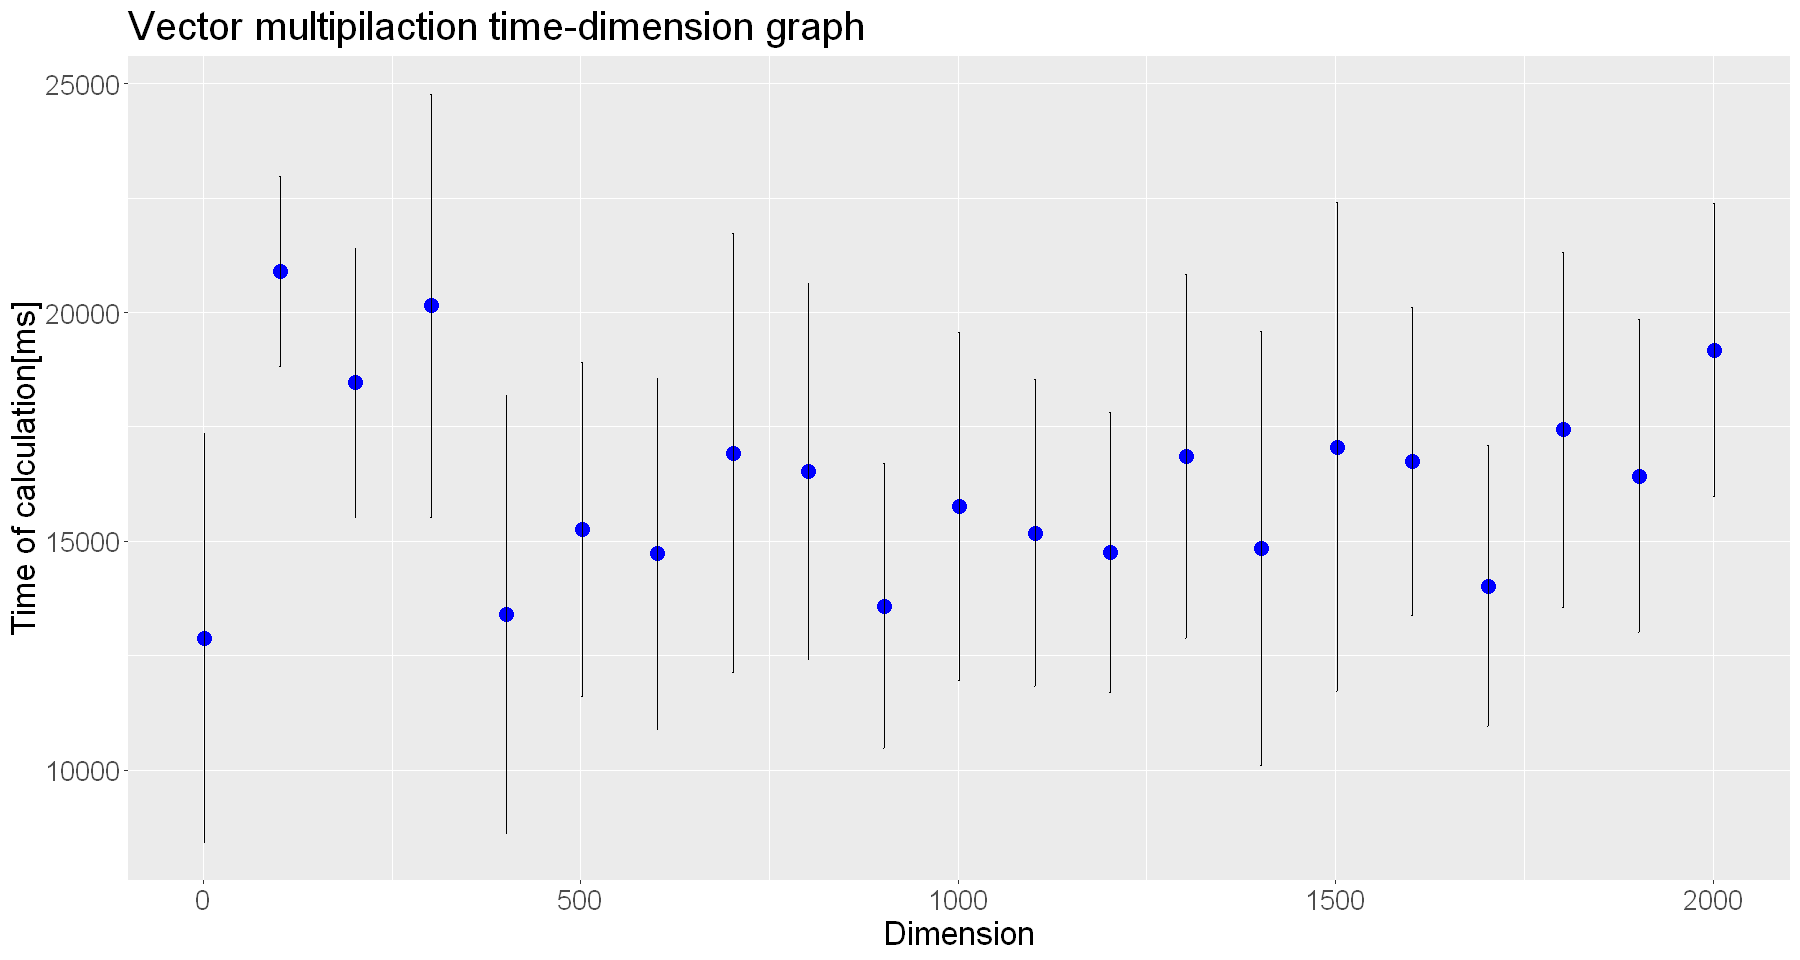

In [37]:
a <- ggplot(df_res, aes(x=size)) + 
geom_point(aes(y = vector), size = 4,color="blue") + 
theme(text = element_text(size = 20)) +
ggtitle("Vector multipilaction time-dimension graph") +
xlab("Dimension") +
ylab("Time of calculation[ms]") + 
geom_errorbar(aes(ymin = vector-vector_error, ymax = vector+vector_error, width=2)) 
a

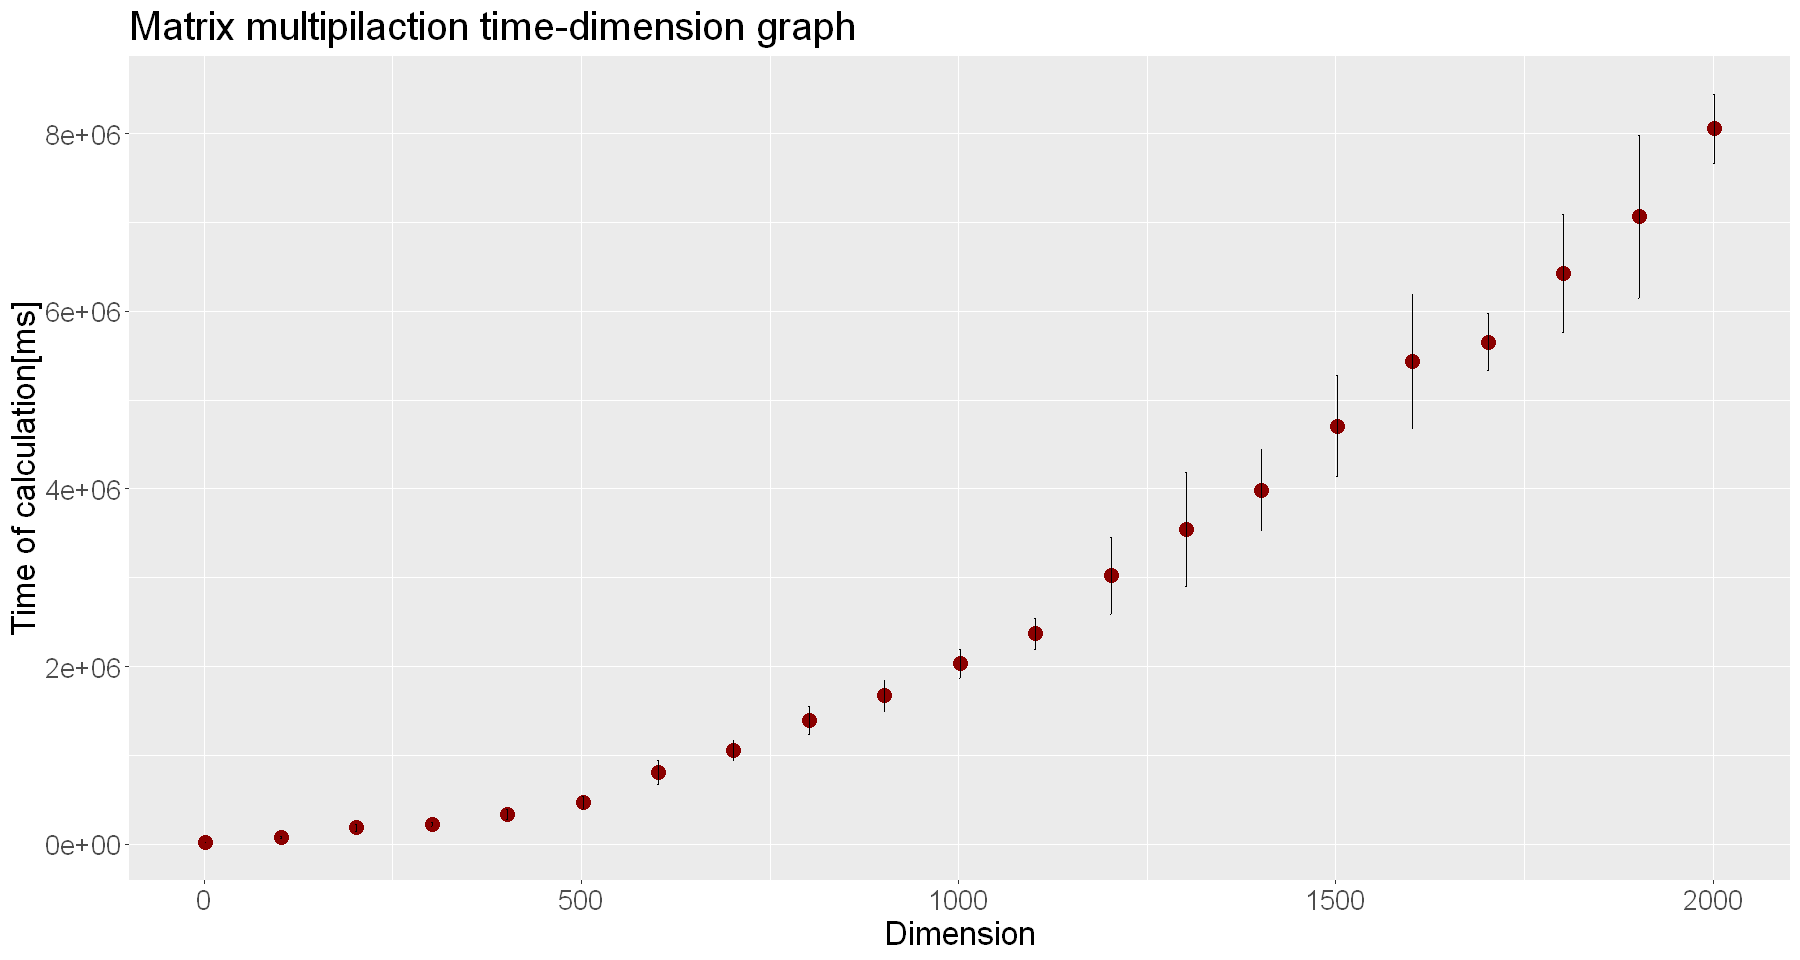

In [38]:
a <- ggplot(df_res, aes(x=size)) + 
geom_point(aes(y=matrix), size = 4, color="darkred") + 
theme(text = element_text(size = 20)) +
ggtitle("Matrix multipilaction time-dimension graph") +
xlab("Dimension") +
ylab("Time of calculation[ms]") + 
geom_errorbar(aes(ymin = matrix-matrix_error, ymax = matrix+matrix_error, width=2)) 
a